In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Data=pd.read_csv(r"D:\Data Science\ML\ML Simplilearn\DSP\Day 9\yelp.csv")

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [4]:
Data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
Data.stars.replace([5,4,3,2,1],["Happy","Happy","Unhappy","Unhappy","Unhappy"],inplace=True)

In [6]:
Data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,Happy,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,Happy,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,Happy,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,Happy,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,Happy,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


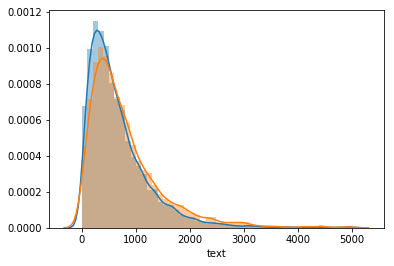

In [7]:
sns.distplot(Data[Data.stars == 'Happy']['text'].apply(len))
sns.distplot(Data[Data.stars == 'Unhappy']['text'].apply(len))

In [8]:
import string
from nltk.corpus import stopwords
def textprocess(data):
    removepun=[char for char in data if char not in string.punctuation]
    sentence=''.join(removepun)
    words=sentence.split(" ")
    removesw=[word for word in words if word.lower() not in stopwords.words('english')]
    return removesw

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
wordVector = CountVectorizer(analyzer=textprocess)
finalWordVector = wordVector.fit(Data['text'])

In [10]:
bow = finalWordVector.transform(Data['text'])

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer().fit(bow)
featureData = tfidf.transform(bow)

In [12]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(featureData,Data['stars'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
model.score(featureData,Data['stars'])

0.6992

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Data['stars'],model.predict(featureData))
cm

array([[6863,    0],
       [3008,  129]], dtype=int64)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(Data['stars'],model.predict(featureData)))

              precision    recall  f1-score   support

       Happy       0.70      1.00      0.82      6863
     Unhappy       1.00      0.04      0.08      3137

   micro avg       0.70      0.70      0.70     10000
   macro avg       0.85      0.52      0.45     10000
weighted avg       0.79      0.70      0.59     10000



In [27]:
Review = input("Enter Review to check:")
step1 = textprocess(Review)
step2 = finalWordVector.transform(step1)
step3 = tfidf.transform(step2)
predict = model.predict(step3[0])
print(f"\n{predict}")

Enter Review to check:"I split the veggie platter with a friend and we only got just over half way through it.  Got the rest to go.  I couldn't wait until I had room to eat again so I could eat the leftovers.  Sooo much good stuff.  I'm usually not a glutton, but there are a precious few places where I lose all self control and beach myself and this is apparently one of them. We were there for an hour and half and asked all sorts of questions about how things were made and what they were.  The lady that waited on us may have been the owner.  She was cheerful and happily indulged our questions. It's a large restaurant with plenty of seating for large groups, but it also seems to be an authentic family outfit.  They have a few beers in bottles and apparently authentic music. I'm sad that I'm moving out of this neighborhood right as this moved in!  If I weren't leaving, I'd probably give up cooking entirely and just eat here every day, or try to get take-out. If you're downtown or on the 